In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', None)

In [2]:
pokemon = pd.read_csv('pokemon_bin_1.csv')
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,capture_rate_bin,experience_growth_bin
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,Bulbasaur,65,65,45,grass,poison,6.9,0,0-0.5,Below 1.1M
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,Ivysaur,80,80,60,grass,poison,13.0,0,0-0.5,Below 1.1M
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,Venusaur,122,120,80,grass,poison,100.0,0,0-0.5,Below 1.1M
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,Charmander,60,50,65,fire,none,8.5,0,0-0.5,Below 1.1M
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,Charmeleon,80,65,80,fire,none,19.0,0,0-0.5,Below 1.1M


In [3]:
pokemon.isnull().sum()

against_bug              0
against_dark             0
against_dragon           0
against_electric         0
against_fairy            0
against_fight            0
against_fire             0
against_flying           0
against_ghost            0
against_grass            0
against_ground           0
against_ice              0
against_normal           0
against_poison           0
against_psychic          0
against_rock             0
against_steel            0
against_water            0
attack                   0
base_happiness           0
base_total               0
defense                  0
height_m                 0
hp                       0
name                     0
sp_attack                0
sp_defense               0
speed                    0
type1                    0
type2                    0
weight_kg                0
is_legendary             0
capture_rate_bin         0
experience_growth_bin    0
dtype: int64

In [4]:
pokemon = pokemon.set_index('name')
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,capture_rate_bin,experience_growth_bin
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,65,65,45,grass,poison,6.9,0,0-0.5,Below 1.1M
Ivysaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,80,80,60,grass,poison,13.0,0,0-0.5,Below 1.1M
Venusaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,122,120,80,grass,poison,100.0,0,0-0.5,Below 1.1M
Charmander,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,60,50,65,fire,none,8.5,0,0-0.5,Below 1.1M
Charmeleon,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,80,65,80,fire,none,19.0,0,0-0.5,Below 1.1M


In [5]:
df = pd.get_dummies(pokemon)

In [6]:
df

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,type2_bug,type2_dark,type2_dragon,type2_electric,type2_fairy,type2_fighting,type2_fire,type2_flying,type2_ghost,type2_grass,type2_ground,type2_ice,type2_none,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water,capture_rate_bin_0-0.5,capture_rate_bin_0.5-1,capture_rate_bin_1-1.5,capture_rate_bin_1.5-2.0,capture_rate_bin_2.0-2.5,capture_rate_bin_2.5+,experience_growth_bin_Above 1.1M,experience_growth_bin_Below 1.1M
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,65,65,45,6.9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Ivysaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,80,80,60,13.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Venusaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,122,120,80,100.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Charmander,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,60,50,65,8.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Charmeleon,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,80,65,80,19.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Celesteela,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,0,570,103,9.2,97,107,101,61,999.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
Kartana,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,0,570,131,0.3,59,59,31,109,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
Guzzlord,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,0,570,53,5.5,223,97,53,43,888.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [7]:
X, y = df.drop(['is_legendary'], axis = 1), df['is_legendary']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, stratify = y)
y.value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [8]:
train_X

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,type2_bug,type2_dark,type2_dragon,type2_electric,type2_fairy,type2_fighting,type2_fire,type2_flying,type2_ghost,type2_grass,type2_ground,type2_ice,type2_none,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water,capture_rate_bin_0-0.5,capture_rate_bin_0.5-1,capture_rate_bin_1-1.5,capture_rate_bin_1.5-2.0,capture_rate_bin_2.0-2.5,capture_rate_bin_2.5+,experience_growth_bin_Above 1.1M,experience_growth_bin_Below 1.1M
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Togetic,0.25,0.5,0.0,2.0,1.0,0.25,1.0,1.0,1.0,0.50,0.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,40,70,405,85,0.6,55,80,105,40,3.2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Azelf,2.00,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,125,140,580,70,0.3,75,125,70,115,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
Drifblim,0.25,2.0,1.0,2.0,1.0,0.00,1.0,1.0,2.0,0.50,0.0,2.0,0.0,0.5,1.0,2.0,1.0,1.0,80,70,498,44,1.2,150,90,54,80,15.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
Fennekin,0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,45,70,307,40,0.4,40,62,60,60,9.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Shelgon,1.00,1.0,2.0,0.5,2.0,1.00,0.5,1.0,1.0,0.50,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,95,35,420,100,1.1,65,60,50,50,110.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vulpix,0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,41,70,299,40,0.0,38,50,65,65,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
Torracat,0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,85,70,420,50,0.7,65,80,50,90,25.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Fletchinder,0.25,1.0,1.0,2.0,0.5,0.50,0.5,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0,73,70,382,55,0.7,62,56,52,84,16.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# Traning Models

In [9]:
#define functions for classifiers
def classifier(model):
    clf = model
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    acc_score = accuracy_score(test_y, y_pred)
    print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
    print("accuracy: ", acc_score)
    return clf, acc_score

### logistic regression


In [10]:
#logistic regression
logistic_regression, acc_log_reg = classifier(LogisticRegression(max_iter = 1000))

[[144   3]
 [  2  12]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       147
           1       0.80      0.86      0.83        14

    accuracy                           0.97       161
   macro avg       0.89      0.92      0.91       161
weighted avg       0.97      0.97      0.97       161

accuracy:  0.968944099378882


C:\Users\58386\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 257.44, 'Predicted label')

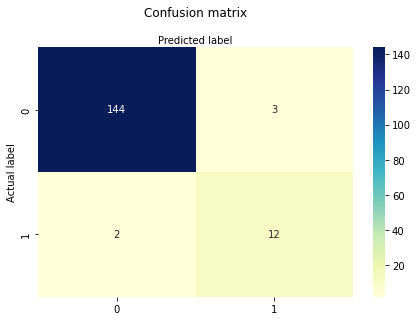

In [11]:
# confusion matrix 
from sklearn import metrics
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(test_y, logistic_regression.predict(test_X))
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [16]:
roc_curve(test_y, logistic_regression.predict(test_X))

(array([0.        , 0.02040816, 1.        ]),
 array([0.        , 0.85714286, 1.        ]),
 array([2, 1, 0], dtype=int64))

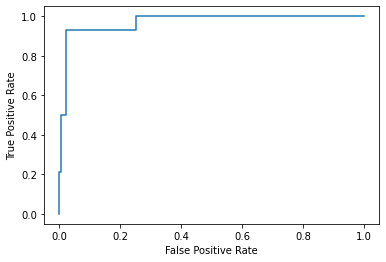

In [18]:
y_pred_proba = logistic_regression.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print('roc score:',roc_auc_score(test_y,y_pred_proba))


roc score: 0.9713313896987366


### random forest


In [13]:
#random forest
random_forest, acc_random_forest = classifier(RandomForestClassifier(n_estimators = 1000, max_depth = 5,  max_features = 10))

[[141   6]
 [  1  13]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       147
           1       0.68      0.93      0.79        14

    accuracy                           0.96       161
   macro avg       0.84      0.94      0.88       161
weighted avg       0.97      0.96      0.96       161

accuracy:  0.9565217391304348


Text(0.5, 257.44, 'Predicted label')

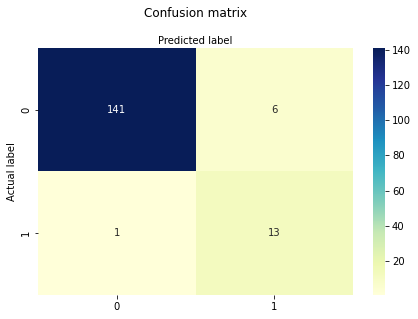

In [14]:
# confusion matrix 
from sklearn import metrics
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(test_y, random_forest.predict(test_X))
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [15]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

# Evaluate the model by comparing three RMSE's.

# test
test_rmse = mean_squared_error(test_y, random_forest.predict(test_X), squared=False)
print(f"Test set RMSE:", test_rmse)

# cv
MSE_CV_scores = - cross_val_score(random_forest, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print(f"CV RMSE:", RMSE_CV)

# train
RMSE_train = (mean_squared_error(train_y, random_forest.predict(train_X)))**(1/2)
print(f"Training set RMSE:",RMSE_train)

Test set RMSE: 0.20851441405707477
CV RMSE: 0.16298006013006622
Training set RMSE: 0.0


In [16]:
importances = random_forest.feature_importances_
std = np.std([random_forest.feature_importances_ for tree in random_forest.estimators_], axis=0)

importances

array([5.85163917e-03, 5.84896000e-03, 4.25917976e-03, 3.01403514e-03,
       3.90815035e-03, 5.51895553e-03, 3.81832813e-03, 3.58024892e-03,
       6.71977183e-03, 3.54496970e-03, 3.18752703e-03, 3.93754214e-03,
       1.27017186e-03, 3.92620986e-03, 7.27070052e-03, 2.66165993e-03,
       2.75319150e-03, 2.29654361e-03, 2.75998039e-02, 1.66338401e-01,
       2.13234557e-01, 2.53848474e-02, 3.85318131e-02, 3.12053031e-02,
       5.95082021e-02, 3.74655381e-02, 4.52581785e-02, 4.81091411e-02,
       5.81474473e-04, 4.09405687e-04, 1.75297160e-03, 8.08084639e-04,
       7.37623153e-05, 5.55019000e-05, 7.57901742e-04, 9.18084635e-04,
       2.05865589e-04, 7.44121725e-04, 5.64785780e-04, 5.95951376e-04,
       2.59055063e-03, 1.13959463e-04, 8.20545397e-03, 4.80014669e-04,
       6.52625501e-04, 7.31661441e-04, 0.00000000e+00, 3.15792570e-04,
       5.74308210e-04, 8.36163736e-05, 1.48684660e-03, 2.35718104e-03,
       1.42200494e-04, 8.62037365e-04, 1.16492649e-04, 2.32201663e-03,
      

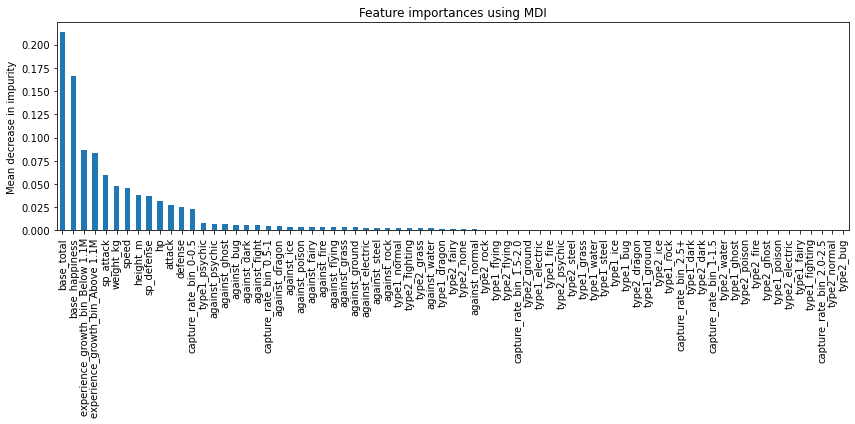

In [17]:

forest_importances = pd.Series(importances, index=train_X.columns)
forest_importances = forest_importances.sort_values(ascending=False)
fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std, ax=ax,figsize=(12, 6))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SGD

In [18]:
#SGD
SGD, acc_sgd = classifier(SGDClassifier())

[[145   2]
 [  8   6]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       147
           1       0.75      0.43      0.55        14

    accuracy                           0.94       161
   macro avg       0.85      0.71      0.76       161
weighted avg       0.93      0.94      0.93       161

accuracy:  0.937888198757764


Text(0.5, 257.44, 'Predicted label')

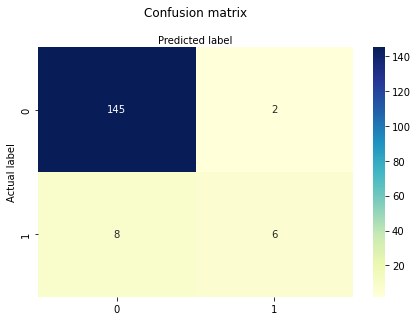

In [19]:
# confusion matrix 
from sklearn import metrics
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(test_y, SGD.predict(test_X))
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### decision tree

In [20]:
#decision tree
decision_tree, acc_decision_tree = classifier(DecisionTreeClassifier())

[[144   3]
 [  3  11]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       147
           1       0.79      0.79      0.79        14

    accuracy                           0.96       161
   macro avg       0.88      0.88      0.88       161
weighted avg       0.96      0.96      0.96       161

accuracy:  0.9627329192546584


Text(0.5, 257.44, 'Predicted label')

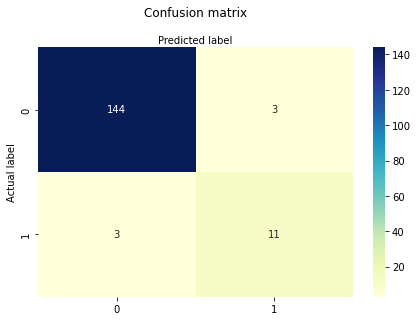

In [21]:
# confusion matrix 
from sklearn import metrics
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(test_y, decision_tree.predict(test_X))
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### SVC

In [22]:
#Linear SVC
linear_SVC, acc_linear_svc = classifier(LinearSVC(max_iter = 100))

[[145   2]
 [  9   5]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       147
           1       0.71      0.36      0.48        14

    accuracy                           0.93       161
   macro avg       0.83      0.67      0.72       161
weighted avg       0.92      0.93      0.92       161

accuracy:  0.9316770186335404


C:\Users\58386\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 257.44, 'Predicted label')

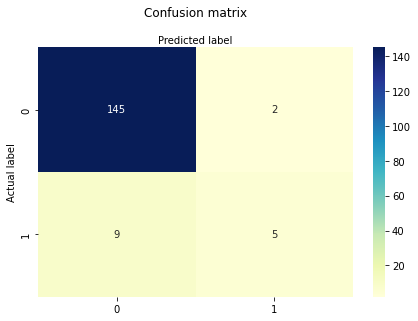

In [23]:
# confusion matrix 
from sklearn import metrics
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(test_y, linear_SVC.predict(test_X))
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### GaussianNB


In [24]:
#GaussianNB
gaussian_NB, acc_gnb = classifier(GaussianNB())

[[103  44]
 [  2  12]]
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       147
           1       0.21      0.86      0.34        14

    accuracy                           0.71       161
   macro avg       0.60      0.78      0.58       161
weighted avg       0.91      0.71      0.78       161

accuracy:  0.7142857142857143


Text(0.5, 257.44, 'Predicted label')

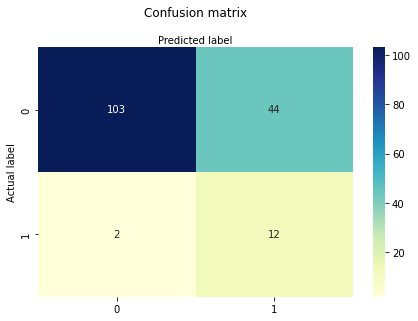

In [25]:
# confusion matrix 
from sklearn import metrics
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(test_y, gaussian_NB.predict(test_X))
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### KNeighbors Classifier


In [26]:
#KNeighbors Classifier
kneighbors, acc_knn = classifier(KNeighborsClassifier())

[[141   6]
 [  3  11]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       147
           1       0.65      0.79      0.71        14

    accuracy                           0.94       161
   macro avg       0.81      0.87      0.84       161
weighted avg       0.95      0.94      0.95       161

accuracy:  0.9440993788819876


Text(0.5, 257.44, 'Predicted label')

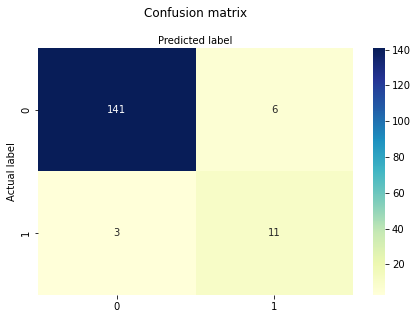

In [27]:
# confusion matrix 
from sklearn import metrics
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(test_y, kneighbors.predict(test_X))
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### Perceptron


In [28]:
#Perceptron
perceptron, acc_perceptron = classifier(Perceptron())

[[147   0]
 [ 12   2]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       147
           1       1.00      0.14      0.25        14

    accuracy                           0.93       161
   macro avg       0.96      0.57      0.61       161
weighted avg       0.93      0.93      0.90       161

accuracy:  0.9254658385093167


Text(0.5, 257.44, 'Predicted label')

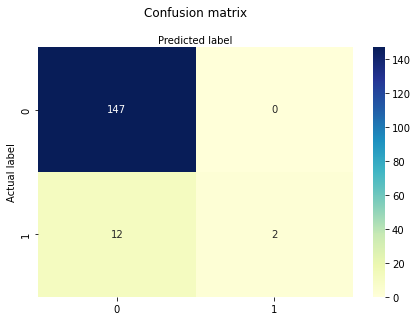

In [29]:
# confusion matrix 
from sklearn import metrics
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(test_y, perceptron.predict(test_X))
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Gaussain Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Descent'],
    
    'Score': [acc_log_reg, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,0.962733
4,Random Forest,0.956522
2,KNN,0.944099
0,Logistic Regression,0.937888
7,Stochastic Gradient Descent,0.937888
1,Linear SVC,0.931677
6,Perceptron,0.925466
5,Gaussain Naive Bayes,0.714286
